<a href="https://colab.research.google.com/github/allen-del/Learning_PyTorch/blob/main/04.%20Using%20Custom%20Datasets%20/04using_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Custom Datasets

While using custom datasets there's a certain amount of **preprocessing** to be done before we can use it to train our model.

<h4>Domain Libraries

Depending on what kind of data you're working on, PyTorch has specific [Domain Libraries](https://pytorch.org/pytorch-domains) for dataloading and preprocessing

## 0. Imports and Device agnostic code setup

In [1]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
torch.__version__ , device

('2.3.0+cu121', 'cuda')

## 1. Get Data

We'll be using a subset of [Food101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) Dataset *(101 classes and 1000 images for each class)*

Our subset has 3 classes and 10% of the images.

How to create the [subset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb)?

Why create the subset?
* To speed up experimentation at the beginning of the project. *(large scale = greater training time)*



In [3]:
import requests
from pathlib import Path
import zipfile

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path is dir():
  print(f"{image_path} directory already exists! Skipping download")
else:
  print(f"{image_path} has been created!")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path /"pizza_steak_sushi.zip", "wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading the images")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping the data")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi has been created!
Unzipping the data


## 2. Data Preparation and Exploration

In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path and returns its contents"""
  space=""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"{space}There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")






In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train' 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test' 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' 


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

###Visualising an image

1. Get all image paths
2. Pick a random image path using Python's `random.choice()`
3. Get image class name using `pathlib.Path.parent.stem`.
4. Open image with Python's PIL (Image Library)
5. We'll then show image and print metadata.

Random image path: data/pizza_steak_sushi/train/sushi/2019344.jpg
Image class: sushi
height x width: 287 x 512


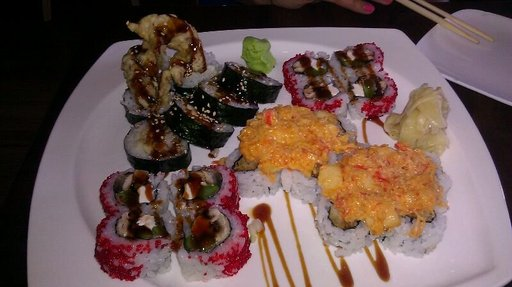

In [7]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg")) #Gets filepaths that matches the regex and then compiles them into a list

#Gets a random image path from list
random_image_path = random.choice(image_path_list)

#Gets class of image
image_class = random_image_path.parent.stem

#Opens image
img = Image.open(random_image_path)

#Print out image characteristics for visualization
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}\nheight x width: {img.height} x {img.width}")
img



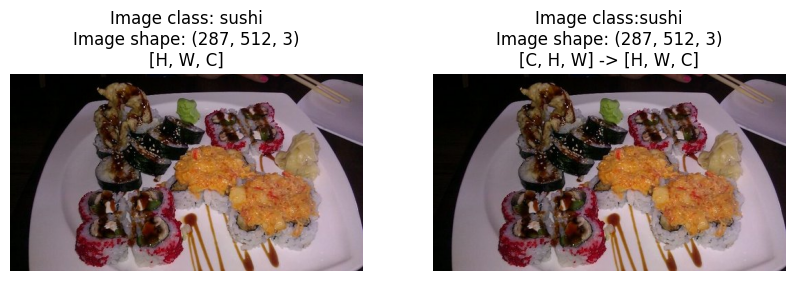

In [8]:
#Plot image using matplotlib

import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import v2

#Convert image to an array

img_as_array = np.asarray(img)

#Alternative: Can convert to tensor

transform = v2.Compose([v2.ToImage()])
img_as_tensor = transform(img)

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}\nImage shape: {img_as_array.shape}\n[H, W, C]")
plt.axis(False);

plt.subplot(1,2,2)
plt.imshow(img_as_tensor.permute(1,2,0)) #After conversion to Tensor, PyTorch follows NCHW but matplotlib (and numpy) follow NHWC.. So rearrange img_as_tensor using torch.permute() to [H, W, C]
plt.title(f"Image class:{image_class}\nImage shape: {img_as_array.shape}\n[C, H, W] -> [H, W, C]")
plt.axis(False);


In [9]:
img_as_tensor

Image([[[ 0,  0,  0,  ...,  5,  4,  4],
        [ 0,  0,  0,  ...,  7,  8,  5],
        [ 0,  0,  0,  ...,  6,  6,  5],
        ...,
        [ 1,  1,  1,  ..., 21, 31, 31],
        [ 1,  1,  1,  ..., 23, 26, 28],
        [ 2,  2,  2,  ..., 23, 23, 24]],

       [[ 0,  0,  0,  ...,  9,  8,  8],
        [ 0,  0,  0,  ..., 11,  9,  9],
        [ 0,  0,  0,  ...,  7,  6,  6],
        ...,
        [ 3,  3,  3,  ..., 13, 21, 23],
        [ 3,  3,  3,  ..., 15, 18, 20],
        [ 4,  4,  4,  ..., 17, 17, 18]],

       [[ 0,  0,  0,  ..., 10,  9,  9],
        [ 0,  0,  0,  ..., 12, 11, 10],
        [ 0,  0,  0,  ...,  9,  8,  8],
        ...,
        [ 0,  0,  0,  ..., 24, 32, 34],
        [ 0,  0,  0,  ..., 26, 29, 31],
        [ 1,  1,  1,  ..., 27, 27, 28]]], dtype=torch.uint8, )

_Notice that the values are not scaled in the range [0,1] as in the case of using_ `transforms.ToTensor`

## 3. Transforming data

Why?

* Convert image into a usable format (tensors)
* Perform Data Augmentation (Resize, Flip, Crop etc.)

Before model training:
1. Turn target data into tensors
2. Turn it into a `torch.utils.data.Dataset` and afterwards a batched iterable using `torch.utils.data.DataLoader`.



In [10]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


In [11]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [12]:
data_transform(img) #Values are scaled

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0392, 0.0275],
         [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0392, 0.0314],
         [0.0000, 0.0000, 0.0000,  ..., 0.1333, 0.0549, 0.0314],
         ...,
         [0.0039, 0.0078, 0.0157,  ..., 0.6667, 0.6627, 0.6588],
         [0.0039, 0.0078, 0.0157,  ..., 0.6784, 0.6706, 0.5843],
         [0.0039, 0.0039, 0.0118,  ..., 0.6784, 0.6196, 0.2941]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0314, 0.0275, 0.0275],
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0314, 0.0275],
         [0.0000, 0.0000, 0.0000,  ..., 0.1098, 0.0471, 0.0353],
         ...,
         [0.0118, 0.0157, 0.0196,  ..., 0.6000, 0.6039, 0.5961],
         [0.0118, 0.0157, 0.0196,  ..., 0.6157, 0.6078, 0.5216],
         [0.0118, 0.0118, 0.0157,  ..., 0.6196, 0.5608, 0.2510]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0392, 0.0353],
         [0.0000, 0.0000, 0.0000,  ..., 0.0510, 0.0431, 0.0353],
         [0.0000, 0.0000, 0.0000,  ..., 0.1373, 0.0627, 0.

<Figure size 1000x1000 with 0 Axes>

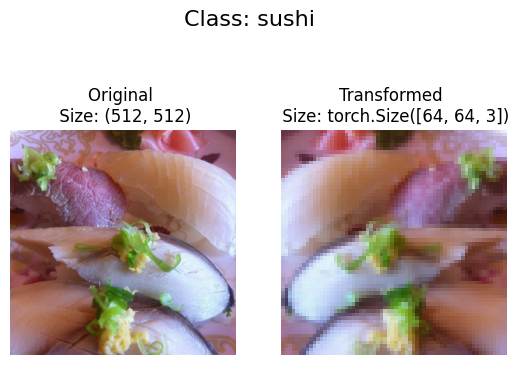

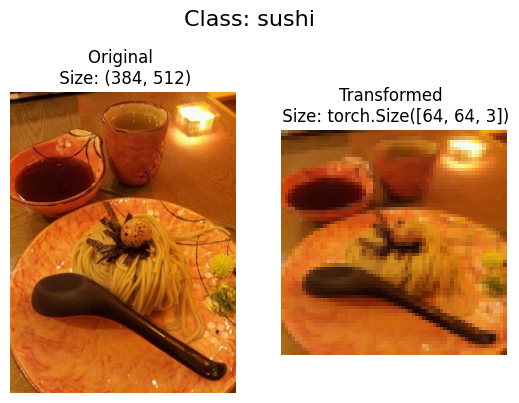

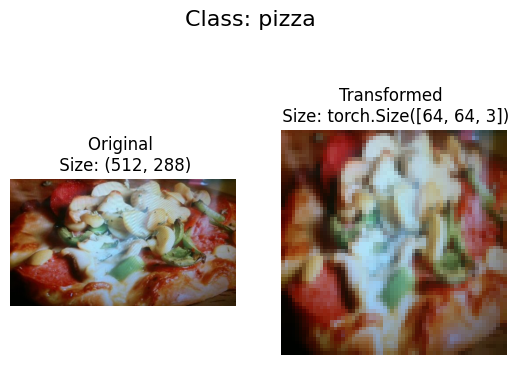

In [13]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """Selects random image from a list containing paths of images and loads/transforms them.
  Plots original and transformed version for comparison"""

  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, n)
  plt.figure(figsize=(10,10))
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2); #Returns figure and axes
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image);
      ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform, seed = 42)


##Loading Images using `Imagefolder`

In [14]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_dir,
                         transform = data_transform,
                         target_transform=None)

test_data = ImageFolder(root = test_dir,
                        transform=data_transform,
                        target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

Using the prebuilt `ImageFolder` loader means there are many attributes that we can access easily

In [15]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [16]:
len(train_data), len(test_data)

(225, 75)

In [17]:
train_data.samples[1]

('data/pizza_steak_sushi/train/pizza/1033251.jpg', 0)

In [18]:
img, label = train_data[0][0], train_data[0][1]

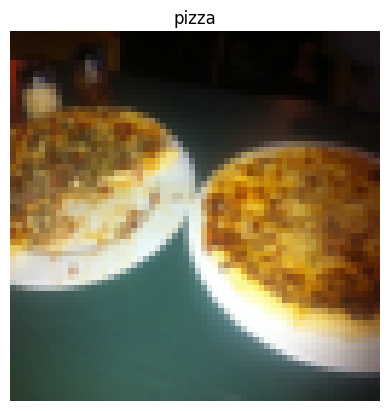

In [19]:
plt.imshow(img.permute(1,2,0))
plt.title(f"{class_names[label]}")
plt.axis(False);

###Turning dataset into DataLoader

In [20]:
import os
os.cpu_count()

2

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True#How many cpu cores to use for this operation
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

In [22]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bebd5bf8ee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bebd5bf9e40>)

In [23]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [24]:
img, label = next(iter(train_dataloader))

img.shape, label.shape


(torch.Size([1, 3, 64, 64]), torch.Size([1]))

##Loading Images using a custom `Dataset` dataloading class

(without `torchvisions.datasets.ImageFolder`)

Should be able to:
1. Load images from file
2. Get class names from Dataset
3. Get classes as Dictionary

In [25]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



###Creating helper function to get class names.

1. Get class names using `os.scandir()`to traverse a target directory(ideally already in standard image classification format)

2. Raise error if class names aren't found

3. Turn class names into dict and list


In [26]:
target_directory = train_dir

print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_names_found


Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [27]:
os.scandir(target_directory)


In [28]:
x = list(os.scandir(target_directory))

x[0].name, x

('sushi', [<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>])

`os.scandir()` returns an iterator over all the objects in the target directory.

A list of these DirEntry objects are then obtained.


DirEntry objects have attribute `.name`


In [29]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Finds the class folder names in target directory """

  #Get class names by scanning target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir()) #Checks if entry is a directory and assigns it to classes as a list

  #Raise an error if class names aren't found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.. please check file structure")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx


In [30]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###Creating the `ImageFolderCustom` class
To create our own custom `Dataset` replicating `ImageFolder`

1. subclass `torch.utils.data.Dataset`
2. init sublass with target directory and transform
3. Create attributes:
  * paths - paths of images
  * transform - transform we're using
  * classes - a list of target class names
  * class_to_idx
4. Create function`loadimages()`to open images
5. Overwrite `__len__()` and `__getitem__()` methods to return length of dataset and return a given sample when an index is passed

In [31]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def loadimage(self, index: int) -> Image.Image:
    """ Opens an image via a path and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    """Returns total number of samples"""
    return len(self.paths) #counts the length of list `paths` which has all the paths of images to get the number of images

  def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
    """Takes an index and returns sample of data and corresponding label (X, y)"""
    img = self.loadimage(index)
    class_name = self.paths[index].parent.name
    class_to_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_to_idx
    else:
      return img, class_to_idx





In [32]:
train_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.4),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])



In [33]:
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                      transform=train_transform)

In [34]:
len(train_data), len(train_data_custom)

(225, 225)

In [35]:
len(test_data), len(test_data_custom)

(75, 75)

In [36]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###Create a function to display random images

1. Take in `Dataset` and number of other paramters such as class names and how many images to visualize
2. Get a list of random sample indexes from target dataset.
3.Set up a plot and Plot with matplotlib.


In [37]:
import matplotlib.pyplot as plt

def display_rand_images(dataset: torch.utils.data.Dataset,
                        classes: List[str] = None,
                        n: int = 5,
                        seed: int = None):

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n) # n random indexes from dataset

  plt.figure(figsize=(15,10))

  #Loop through random indexes that we sampled before and plot
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0) #[CHW]-> [HWC]

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False);

    if classes:
      title = f"Class: {classes[targ_label]} \nShape:{targ_image_adjust.shape}"

      plt.title(title)



_Note:_ Length of `train_data_custom` = `225`


Takes a range of length of dataset and samples `n` random numbers from it.

In [38]:
random_samples_idx = random.sample(range(len(train_data_custom)), k=5)
random_samples_idx

[62, 57, 35, 188, 26]

Understand that `dataset[index]` calls the `__getitem__()` method

In our `ImageFolderCustom` case it returns a tuple of image(as a tensor) and label

In [39]:
type(train_data_custom[0]), type(train_data[0])

(tuple, tuple)

In [40]:
train_data_custom[0][0]#, train_data_custom[0][1]

tensor([[[0.3412, 0.2784, 0.3647,  ..., 0.5843, 0.6157, 0.6627],
         [0.2078, 0.2667, 0.5294,  ..., 0.5725, 0.6157, 0.6471],
         [0.2549, 0.5647, 0.7176,  ..., 0.5137, 0.5412, 0.5882],
         ...,
         [0.2824, 0.3059, 0.4627,  ..., 0.4549, 0.4510, 0.3843],
         [0.4078, 0.3922, 0.3961,  ..., 0.4667, 0.4627, 0.3373],
         [0.4784, 0.4549, 0.4000,  ..., 0.3765, 0.4157, 0.2941]],

        [[0.3451, 0.2863, 0.3373,  ..., 0.3020, 0.3373, 0.4157],
         [0.2039, 0.2510, 0.4706,  ..., 0.2941, 0.3490, 0.4196],
         [0.2353, 0.5294, 0.6627,  ..., 0.2392, 0.2745, 0.3529],
         ...,
         [0.2588, 0.2510, 0.3765,  ..., 0.4196, 0.4314, 0.3608],
         [0.3804, 0.3451, 0.3216,  ..., 0.4275, 0.4353, 0.3098],
         [0.4588, 0.4157, 0.3529,  ..., 0.3255, 0.3686, 0.2588]],

        [[0.3843, 0.3216, 0.3294,  ..., 0.1451, 0.1647, 0.2157],
         [0.2118, 0.2275, 0.3765,  ..., 0.1451, 0.1765, 0.2157],
         [0.1922, 0.4118, 0.4980,  ..., 0.1176, 0.1333, 0.

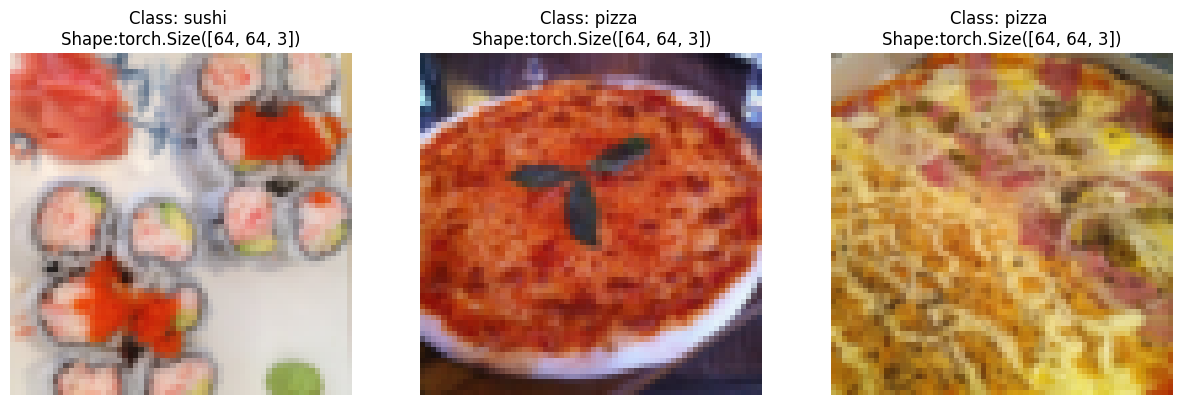

In [41]:
#Use train_data made using ImageFolder
display_rand_images(train_data,
                      classes = class_names,
                      n=3,
                      seed = 69
                      )

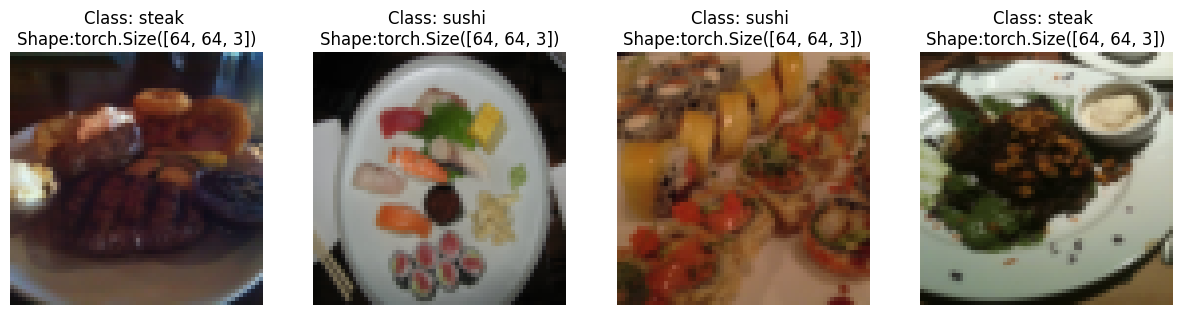

In [42]:
#Use train_data_custom made using ImageFolderCustom
display_rand_images(train_data_custom,
                      classes = class_names,
                      n=4)

###Turning custom loaded images dataset into DataLoader

In [43]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count() #How many cores running the dataloader task

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

In [44]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7bebd2b462c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bebd2b0dc60>)

In [45]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, len(label_custom)

(torch.Size([32, 3, 64, 64]), 32)

##Data Augmentation

Artificially change/modify the data (image in our case) to add diversity to the training data, thereby reducing overfitting by learning generalizable patterns.

Example: Let's look at `TrivialAugment` for image data

It randomly selects images and applies transforms

In [46]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=8),
                                      transforms.ToTensor()
                                                        ])

test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                    transforms.ToTensor()])


<Figure size 1000x1000 with 0 Axes>

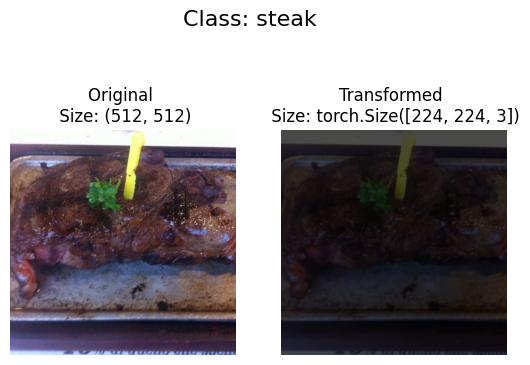

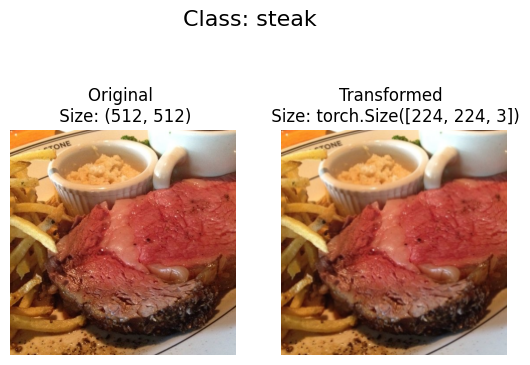

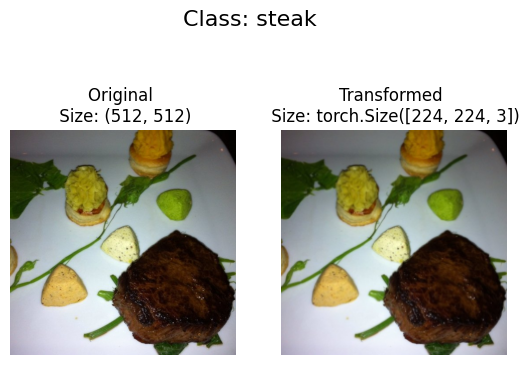

In [47]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

##Building a Baseline Model![overfitting_underfitting.jpg](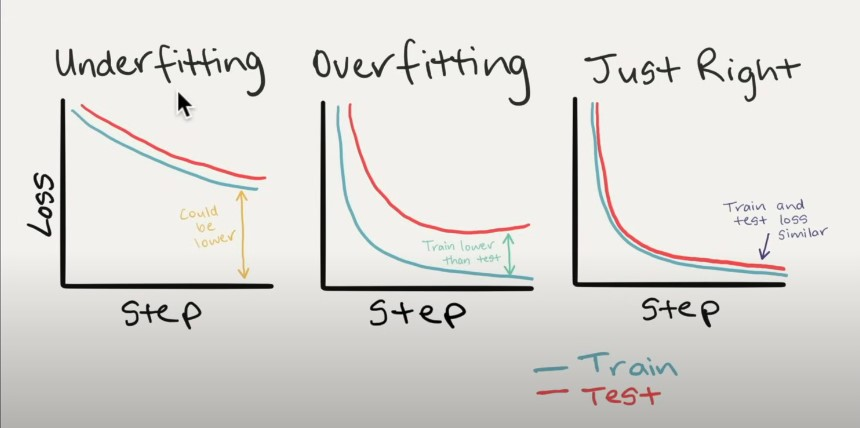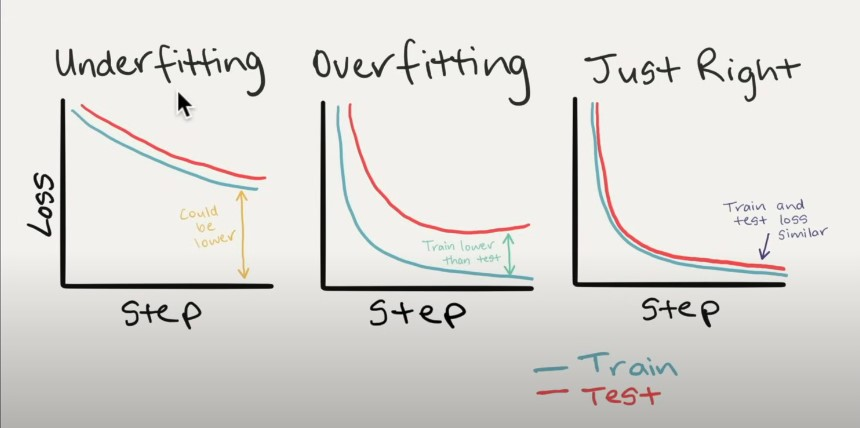)

**TinyVGG Architecture**

Model 0 - We'll train without data augmentaion

In [48]:
import torch
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape,
                  )
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier_layer(x)
    #print(x.shape)

    return x

In [49]:
INPUT_SHAPE = 3 #Color channels
HIDDEN_UNITS = 10
OUTPUT_SHAPE = 3

model_0 = TinyVGG(input_shape = INPUT_SHAPE,
                  hidden_units = HIDDEN_UNITS,
                  output_shape = OUTPUT_SHAPE).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

###Creating Transforms and loading data for model_0

In [50]:
#Creating transforms and loading data for Model 0

from torchvision.datasets import ImageFolder

simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

#Loading data using ImageFolder

train_data_simple = ImageFolder(root=train_dir,
                         transform = simple_transform)

test_data_simple = ImageFolder(root = test_dir,
                               transform = simple_transform)


#Create DataLoader for batches

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)


In [51]:
len(train_dataloader_simple)

8

In [52]:
image_batch, label_batch = next(iter(test_dataloader_simple))

In [53]:
y_fpcheck = model_0(image_batch.to(device))

In [54]:
y_fpclass = y_fpcheck.softmax(dim=1)
y_fpclass.argmax(dim=1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

###Using `torchinfo`

To get an idea of the shapes passing through the model.


In [55]:
!pip install torchinfo

In [56]:
from torchinfo import summary

summary(model_0, input_size = (BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

###Setting up functions for train step, test step and testing and training loops

In [57]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device
               ):

  """Training Loop function that steps through all the batches in data_loader and returns train loss and train accuracy"""

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_loss += loss.item()
    acc = accuracy_fn(y, y_logits.softmax(dim=1).argmax(dim=1))
    train_acc += acc.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss = train_loss / len(data_loader)
  train_acc = train_acc / len(data_loader)

  print(f"Train Loss: {train_loss: .4f}, Acc: {train_acc: .3f} %")

  return train_loss, train_acc



In [58]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):


  """Testing Loop that steps through all batches in data_loader and returns test loss and test accuracy"""

  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():

    for X, y in iter(data_loader):

      X, y = X.to(device), y.to(device)

      y_logits = model(X)

      loss = loss_fn(y_logits, y)
      test_loss = test_loss + loss.item()

      acc = ((y_logits.argmax(dim=1)) == y).sum().item()/ len(y_logits)
      test_acc = test_acc + acc

    test_loss = test_loss / len(data_loader)
    test_acc = test_acc / len(data_loader)

    print(f"Test Loss: {test_loss: .4f}, Acc: {test_acc: .3f} %")

  return test_loss, test_acc

In [59]:
from tqdm.auto import tqdm
def train_and_test(model: torch.nn.Module,
                   train_dataloader: torch.utils.data.DataLoader,
                   test_dataloader: torch.utils.data.DataLoader,
                   loss_fn: torch.nn.Module,
                   optimizer: torch.optim.Optimizer,
                   accuracy_fn,
                   epochs: int,
                   device: torch.device = device):

  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):

    print(f"Epoch {epoch}")
    train_loss, train_acc = train_step(model,
                                       train_dataloader,
                                       loss_fn,
                                       optimizer,
                                       accuracy_fn,
                                       device
                                       )

    test_loss, test_acc = test_step(model,
                                    test_dataloader,
                                    loss_fn,
                                    device)

    with torch.inference_mode():
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  return results

In [60]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

###Setup Loss function, Optimizer, Accuracy function

In [61]:
from torchmetrics.classification import MulticlassAccuracy

acc_fn = MulticlassAccuracy(num_classes = len(class_names)).to(device)

In [62]:
INPUT_SHAPE = 3 #Color channels
HIDDEN_UNITS = 10
OUTPUT_SHAPE = 3

model_0 = TinyVGG(input_shape = INPUT_SHAPE,
                  hidden_units = HIDDEN_UNITS,
                  output_shape = OUTPUT_SHAPE).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr = 0.001)

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

NUM_EPOCHS = 10

model_0_results = train_and_test(model_0,
                               train_dataloader_simple,
                               test_dataloader_simple,
                               loss_fn,
                               optimizer,
                               acc_fn,
                               NUM_EPOCHS,
                               device)

end_time = timer()

print(f"\n\nTotal train time: {end_time - start_time: .3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0
Train Loss:  1.1031, Acc:  0.094 %
Test Loss:  1.0935, Acc:  0.542 %
Epoch 1
Train Loss:  1.0955, Acc:  0.256 %
Test Loss:  1.0992, Acc:  0.260 %
Epoch 2
Train Loss:  1.0920, Acc:  0.225 %
Test Loss:  1.1061, Acc:  0.260 %
Epoch 3
Train Loss:  1.0993, Acc:  0.102 %
Test Loss:  1.1165, Acc:  0.260 %
Epoch 4
Train Loss:  1.0935, Acc:  0.252 %
Test Loss:  1.1157, Acc:  0.281 %
Epoch 5
Train Loss:  1.0779, Acc:  0.367 %
Test Loss:  1.1237, Acc:  0.312 %
Epoch 6
Train Loss:  1.0217, Acc:  0.446 %
Test Loss:  1.0923, Acc:  0.281 %
Epoch 7
Train Loss:  1.0506, Acc:  0.252 %
Test Loss:  1.0179, Acc:  0.577 %
Epoch 8
Train Loss:  1.0270, Acc:  0.395 %
Test Loss:  1.1142, Acc:  0.333 %
Epoch 9
Train Loss:  0.9468, Acc:  0.505 %
Test Loss:  0.9776, Acc:  0.392 %


Total train time:  21.348


In [65]:
model_0_results

{'train_loss': [1.1031038761138916,
  1.0955337882041931,
  1.092049315571785,
  1.099302589893341,
  1.0934709161520004,
  1.0778654962778091,
  1.0216547548770905,
  1.05056931078434,
  1.0270131826400757,
  0.9468352943658829],
 'train_acc': [0.09375000232830644,
  0.255952381528914,
  0.2252604179084301,
  0.10156250186264515,
  0.25182127486914396,
  0.367269542068243,
  0.44570471346378326,
  0.2517547123134136,
  0.394873533397913,
  0.5054205134510994],
 'test_loss': [1.0935230652491252,
  1.0992319583892822,
  1.1061060428619385,
  1.1165042320887248,
  1.1156789859135945,
  1.123658259709676,
  1.0922647714614868,
  1.0178976853688557,
  1.1142103870709736,
  0.9776391983032227],
 'test_acc': [0.5416666666666666,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.28125,
  0.3125,
  0.28125,
  0.5767045454545454,
  0.3333333333333333,
  0.3920454545454546]}

###Plotting Loss curves of model_0

In [66]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [67]:
def plot_loss_curves(results: Dict[str, List[float]]):

  """ Plots training (both loss and accuracy) curves of results dictionary. """

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  #Plot Loss

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label ="train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot Accuracy

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label ="train_accuracy")
  plt.plot(epochs, test_acc, label = "test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()



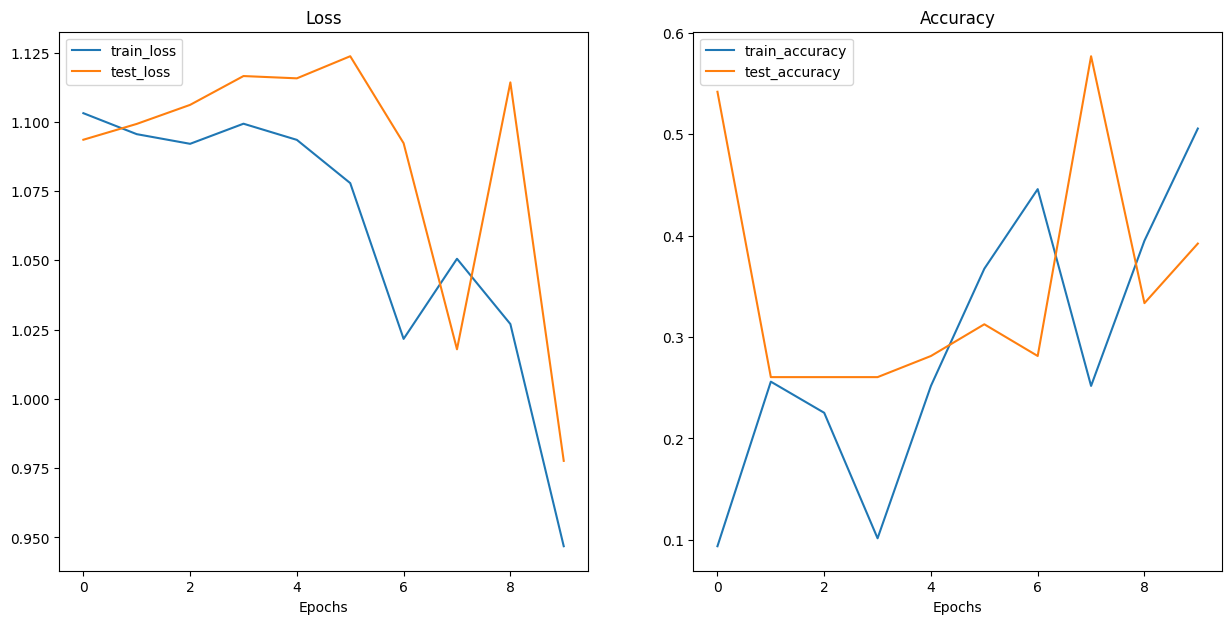

In [68]:
plot_loss_curves(model_0_results)

Our model is currently underfitting.

Let's try fixing that.



###Trying if MiniVGG works better

In [69]:
import torch
from torch import nn
class MiniVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units*2,
                  kernel_size = 2,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units*2,
                  out_channels = hidden_units*2,
                  kernel_size = 2,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units*2,
                  out_channels = hidden_units*4,
                  kernel_size = 2,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units*4,
                  out_channels = hidden_units*4,
                  kernel_size = 2,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )

    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*12*12,
                  out_features=hidden_units*12*12,
                  ),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units*12*12,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)

    x = self.classifier_layer(x)

    return x

In [70]:
INPUT_SHAPE = 3 #Color channels
HIDDEN_UNITS = 10
OUTPUT_SHAPE = 3

model_1 = MiniVGG(input_shape = INPUT_SHAPE,
                  hidden_units = HIDDEN_UNITS,
                  output_shape = OUTPUT_SHAPE).to(device)
model_1

MiniVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 40, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1440, out_features=1440, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1440

In [71]:
from torchinfo import summary

summary(model_1, input_size = (BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MiniVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 20, 14, 14]          --
│    └─Conv2d: 2-6                       [32, 20, 29, 29]          820
│    └─ReLU: 2-7                         [32, 20, 29, 29]          --
│    └─Conv2d: 2-8                       [32, 20, 28, 28]          1,620
│    └─ReLU: 2-9                         [32, 20, 28, 28]          --
│    └─MaxPool2d: 2-10                   [32, 20, 14, 14]          --
├─Sequent

In [72]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr = 0.005)

In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

NUM_EPOCHS = 10

model_1_results = train_and_test(model_1,
                               train_dataloader_simple,
                               test_dataloader_simple,
                               loss_fn,
                               optimizer,
                               acc_fn,
                               NUM_EPOCHS,
                               device)

end_time = timer()

print(f"\n\nTotal train time: {end_time - start_time: .3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Train Loss:  1.2303, Acc:  0.221 %
Test Loss:  1.1177, Acc:  0.260 %
Epoch 1
Train Loss:  1.0903, Acc:  0.225 %
Test Loss:  1.1182, Acc:  0.260 %
Epoch 2
Train Loss:  1.0830, Acc:  0.225 %
Test Loss:  1.1390, Acc:  0.260 %
Epoch 3
Train Loss:  1.1136, Acc:  0.102 %
Test Loss:  1.1511, Acc:  0.260 %
Epoch 4
Train Loss:  1.0979, Acc:  0.225 %
Test Loss:  1.1103, Acc:  0.260 %
Epoch 5
Train Loss:  1.1008, Acc:  0.102 %
Test Loss:  1.1221, Acc:  0.260 %
Epoch 6
Train Loss:  1.0943, Acc:  0.102 %
Test Loss:  1.1493, Acc:  0.260 %
Epoch 7
Train Loss:  1.0952, Acc:  0.090 %
Test Loss:  1.1544, Acc:  0.198 %
Epoch 8
Train Loss:  1.1224, Acc:  0.098 %
Test Loss:  1.1475, Acc:  0.260 %
Epoch 9
Train Loss:  1.0940, Acc:  0.225 %
Test Loss:  1.1152, Acc:  0.260 %


Total train time:  22.505


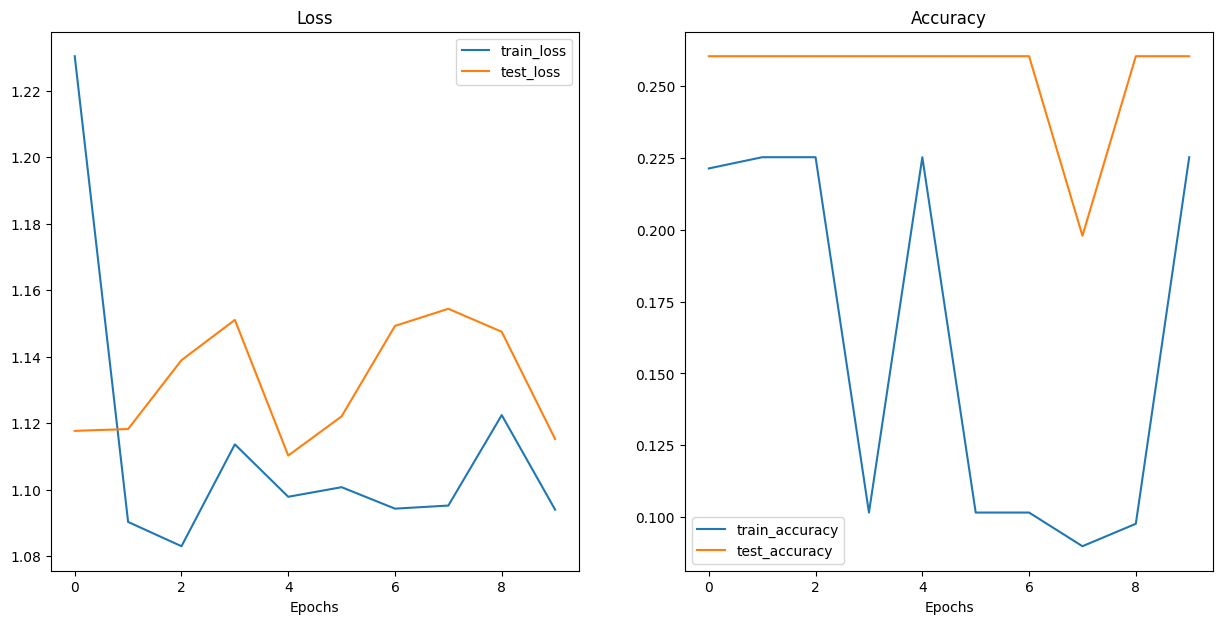

In [74]:
plot_loss_curves(model_1_results)

Welp! Doesn't looks like MiniVGG works a lot better.

/* sigh */

We have a long way to go.

Let's try using Data Augmentation on the dataset to reduce overfitting.


_Note: this is **not the only way** to reduce overfitting_

[Also read](https://stats.stackexchange.com/questions/488434/can-overfitting-and-underfitting-occur-simultaneously)


##Model 2: TinyVGG with Data Augmentation

Let's use [`Transforms.TrivialAugmentWide`](https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html) for Data Augmentation


###Load Data and augment

In [75]:
from torchvision import transforms



train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()])





In [80]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_data_aug = ImageFolder(root=train_dir,
                             transform = train_transform_trivial
                             )

test_data_simple = ImageFolder(root=test_dir,
                               transform = simple_transform) #Don't augment test data

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_aug = DataLoader(dataset=train_data_aug,
                                  batch_size = BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)







###Initialize model_2 and train

In [81]:
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=3
                  ).to(device)

model_2


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [86]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_2_results = train_and_test(model_2,
                                train_dataloader_aug,
                                test_dataloader_simple,
                                 loss_fn,
                                 optimizer,
                                 acc_fn,
                                 NUM_EPOCHS,
                                 device)

end_time = timer()

print(f"\nTotal training time for model 2 : {end_time-start_time: .3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0
Train Loss:  1.1058, Acc:  0.083 %
Test Loss:  1.1015, Acc:  0.260 %
Epoch 1
Train Loss:  1.0836, Acc:  0.225 %
Test Loss:  1.1241, Acc:  0.260 %
Epoch 2
Train Loss:  1.0776, Acc:  0.225 %
Test Loss:  1.1557, Acc:  0.260 %
Epoch 3
Train Loss:  1.1238, Acc:  0.102 %
Test Loss:  1.1519, Acc:  0.260 %
Epoch 4
Train Loss:  1.0853, Acc:  0.247 %
Test Loss:  1.1207, Acc:  0.281 %
Epoch 5
Train Loss:  1.0922, Acc:  0.225 %
Test Loss:  1.1259, Acc:  0.281 %
Epoch 6
Train Loss:  1.0882, Acc:  0.391 %
Test Loss:  1.1304, Acc:  0.260 %
Epoch 7
Train Loss:  1.0934, Acc:  0.237 %
Test Loss:  1.1418, Acc:  0.302 %
Epoch 8
Train Loss:  1.1279, Acc:  0.185 %
Test Loss:  1.1542, Acc:  0.260 %
Epoch 9
Train Loss:  1.0786, Acc:  0.339 %
Test Loss:  1.1039, Acc:  0.271 %

Total training time for model 2 :  11.985 seconds


###Visualize loss and accuracy curves

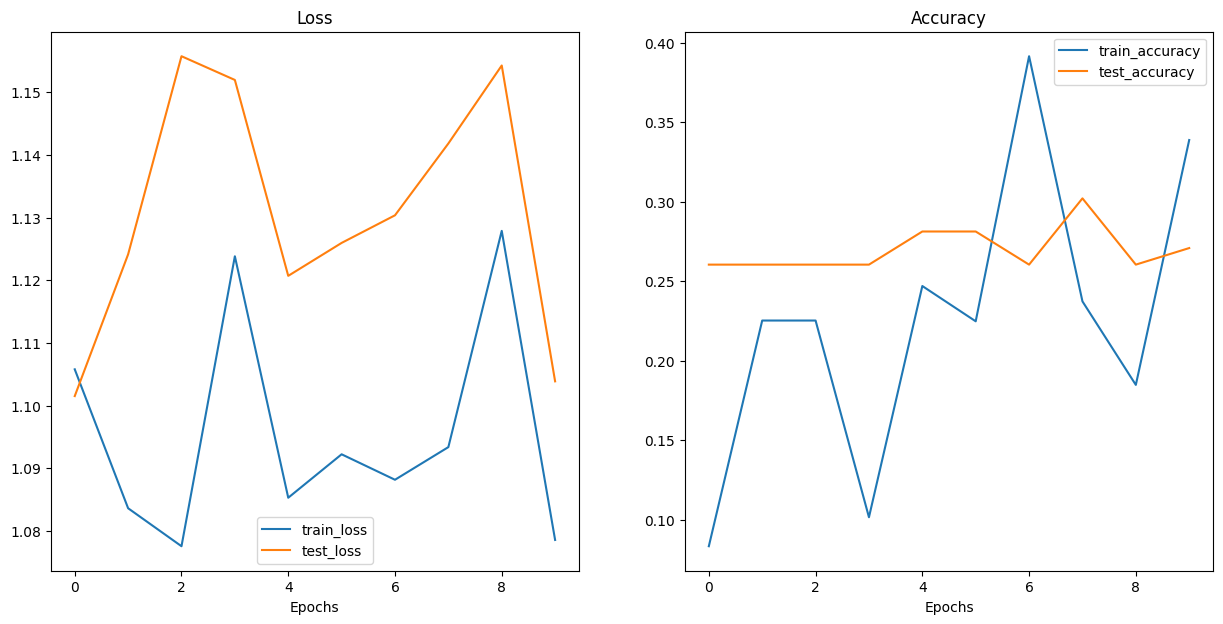

In [87]:
plot_loss_curves(model_2_results)

Didn't improve our performance much.. Pretty much same or worse values of loss

Our model is **both** underfitting and overfitting

## Compare Model Results

Some common ways to compare different models and track the experiments we do are:
1. Hard coding
2.PyTorch + Tensorboard
3.Weights & Biases
4. MLFlow

In [91]:
#Convert results stored as Dict to pandas DataFrame
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_2_df = pd.DataFrame(model_2_results)


In [97]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

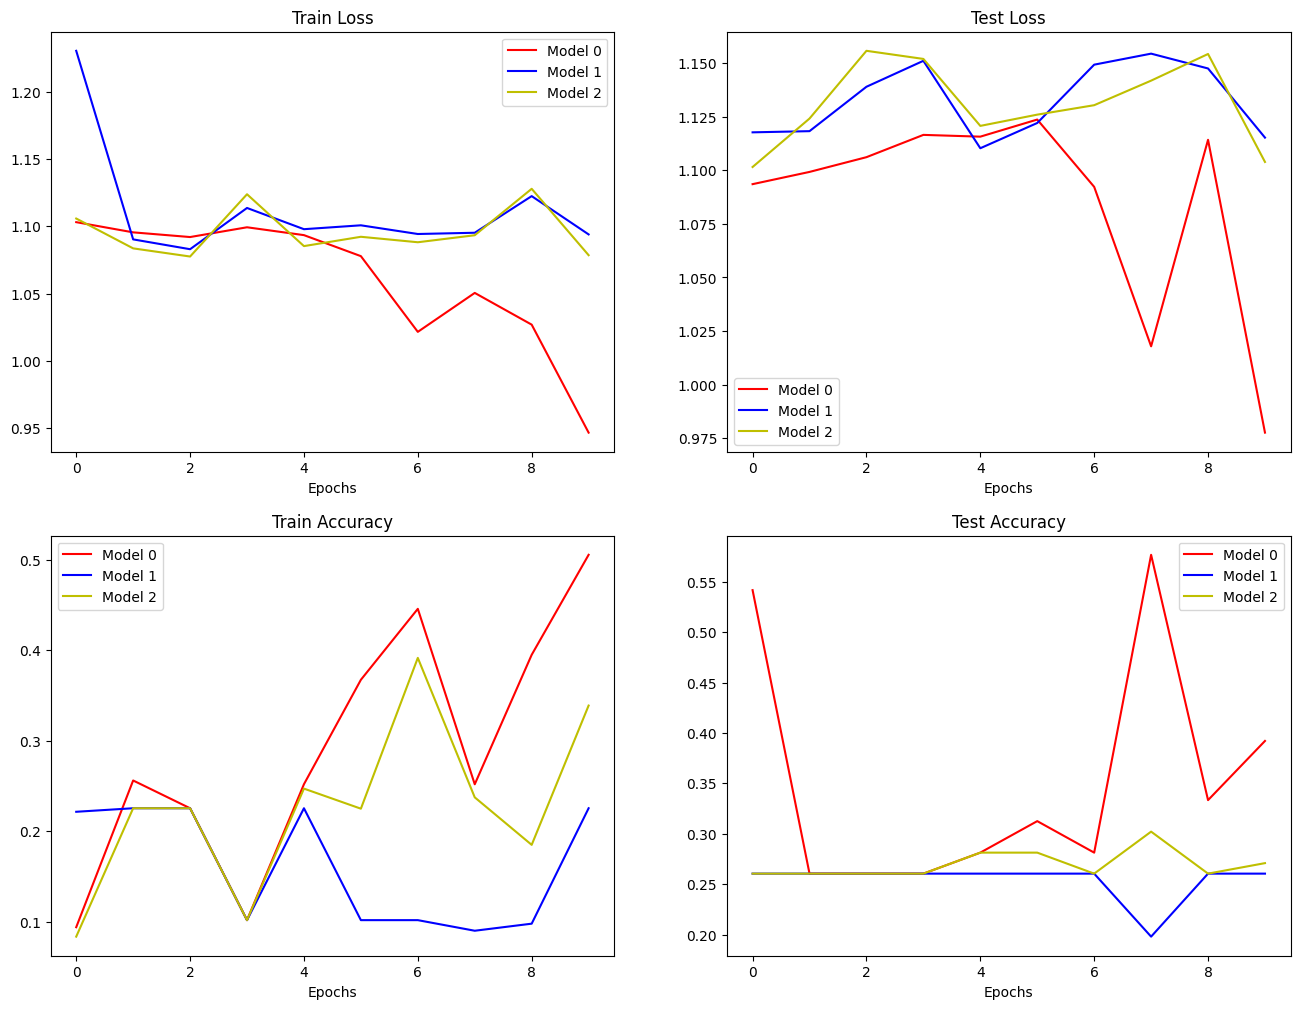

In [99]:
#Setup a plot to visualize

plt.figure(figsize=(16,12))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0", c='r')
plt.plot(epochs, model_1_df["train_loss"], label="Model 1", c='b')
plt.plot(epochs, model_2_df["train_loss"], label="Model 2", c='y')
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0", c='r')
plt.plot(epochs, model_1_df["test_loss"], label="Model 1", c='b')
plt.plot(epochs, model_2_df["test_loss"], label="Model 2", c='y')
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0", c='r')
plt.plot(epochs, model_1_df["train_acc"], label="Model 1", c='b')
plt.plot(epochs, model_2_df["train_acc"], label="Model 2", c='y')
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0", c='r')
plt.plot(epochs, model_1_df["test_acc"], label="Model 1", c='b')
plt.plot(epochs, model_2_df["test_acc"], label="Model 2", c='y')
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

`model_0` seems to be the best performing out of the three models